In [9]:
# Brookes Heil Blackburn
# MAT 5990 Spring 2026
# Homework #1 - Question 3

In [10]:
%matplotlib widget
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

   X  Y  z
0 -1  2 -1
1  0  2  1
2  1  2  1
3  2  1 -1
   c_0  c_1
0    1    4
1    0    4
2    1    4
3    4    1
[-0.31436314  0.13821138]
       gval  is_positive
0  0.238482            0
1  0.552846            1
2  0.238482            1
3 -1.119241            0


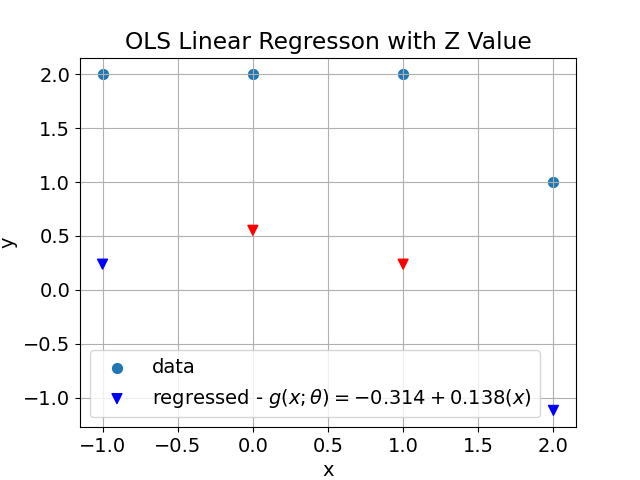

In [48]:
# Adapted from Professor Aminians Code
# given individual data x, define the 
# functions in a row of Phi.
# Most function formulas should work "as you expect"
# (assuming x is a numpy array).

# note to self: In linear regression c_0(x) + c_1 (y) results in Phi:
# Phi col n=1 of all X vector for phi_0 (note just x in above)
# Phi col n=2 is all of Y vector phi_1 (note just y in above)

gfuncs = lambda x, y : np.array([
        x**2,
        y**2
        ])


# The Data
X = np.array([-1, 0, 1, 2])
Y = np.array([2, 2, 2, 1])
z = np.array([-1, 1, 1, -1])

# I would rather work in data frame 
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'z': z
})
print(df)

# Plug X & Y into each \phi function and create Phi df
Phi_g = pd.DataFrame()
Phi_g['c_0'] = df['X']**2
Phi_g['c_1'] = df['Y']**2
print(Phi_g)

# Let Python solve for theta in the \Phi^T\Phi\theta = \Phi^T * y "Normals Equations"
# Theta represents the c_0 and c_1 which are the coefficients on the linear regression

theta_g = np.linalg.lstsq(Phi_g, z)[0]
print(theta_g)

# gvals represent the function output of the g(X, \theta)...the intercept(c_0) and slope(c_1) of linear regression
# with least residuals

gvals = Phi_g @ theta_g # matrix-vector product
gvals = pd.DataFrame(gvals)
gvals.columns = ['gval']
gvals['is_positive'] = (df['z'] > 0).astype(int)
# gvals.info()
print(gvals)


## ---------------- For Question 4 --------------------------------------------
# e_x = np.linspace(-2,2,100)
# e_y = np.linspace(-1,1,100)
# ellipis_points = ((e_x)**2/2) + (e_y)**2
# ax.scatter(e_x,ellipis_points, marker='.')
# print(ellipis_points)
# Visualize

fig,ax = plt.subplots()

# original data
ax.scatter(X,Y, marker='o', s=50, label='data')

# regression
ax.scatter(X, gvals['gval'], c=gvals['is_positive'],cmap='bwr',marker='v', s=50, label=rf'regressed - $g(x; \theta) = {theta_g[0]: .3f} + {theta_g[1]: .3f}(x)$', zorder=2)

# polish
ax.legend()
ax.set(title='OLS Linear Regresson with Z Value',xlabel='x', ylabel='y')
ax.grid()
plt.savefig(f'MAT5990_HW1_3.jpg')
